I chose to only use the three entities below because they were the only ones I thought looked like there could be anomalies & had enough points to go off of. Also in preprocessing I made the assumption that dates without counts meant the count was 0, so I filled those in manually. For some reason only May 12th - 31st had points, so thats the time frame I used, which is also why I only set daily seasonality to true, since there wasn't enough for weekly or yearly. I determined daily seasonality simply based on of intuition. I did not do anything to verify the need for daily seasonality becasuse that in itself could be a project. Lastly, if you run this on your machine the path to the python script is probably different. 

In [1]:
%run -i '~/Spring2021/dataMining/csci347-final-project/data_processing.py'

In [2]:
import matplotlib.pyplot as plt

In [3]:
initial_df_383 = pd.DataFrame()

initial_df_383['ds'] = entity383_df['dateTime']
initial_df_383['y'] = entity383_df['ct']

interval_width = 0.95 - translates to a confidence interval of 95%, could probably take out/change US holidays, since the attacks weren't in the US, but the events were happening in many different parts of the world, so using the US ones seemed like a good place to start. 

In [4]:
def fit_predict_model(dataframe, interval_width = 0.95, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = True, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m.add_country_holidays(country_name='US')
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast
    
pred_383 = fit_predict_model(initial_df_383)

INFO:prophet:n_changepoints greater than number of observations. Using 15.


In [5]:
 #detect anomalies
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1
    
    return forecasted

pred_383 = detect_anomalies(pred_383)

In [6]:
pred_383.anomaly.value_counts()

0    18
1     2
Name: anomaly, dtype: int64

In [7]:
df_anomaly_383 = pred_383.drop(pred_383[pred_383.anomaly==0].index)
df_noanomalies_383 = pred_383.drop(pred_383[pred_383.anomaly!=0].index)

The light blue area on the graph is the 95% confidence interval.

(array([16203., 16205., 16207., 16209., 16211., 16213., 16215., 16217.,
        16219., 16221.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

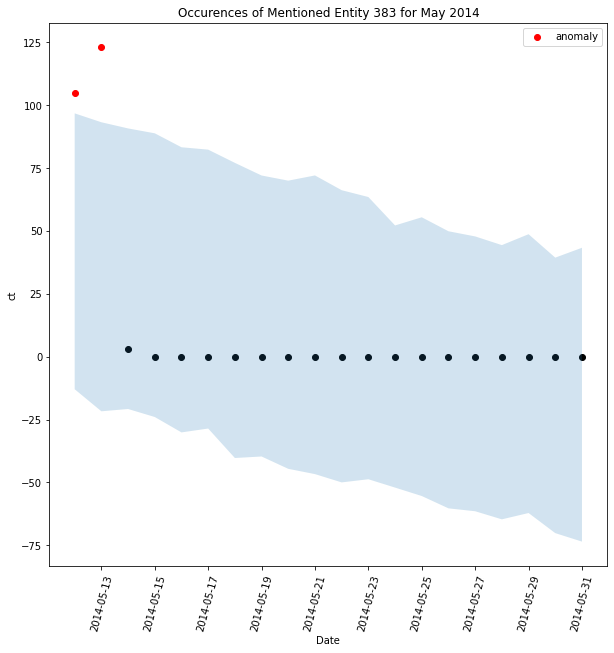

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df_noanomalies_383.ds,df_noanomalies_383.fact,c='k',label='_nolegend_')
ax.scatter(df_anomaly_383.ds, df_anomaly_383.fact,c='r',label='anomaly')
ax.fill_between(pred_383.ds, pred_383.yhat_lower, pred_383.yhat_upper, alpha=0.2)
ax.set(xlabel='Date', ylabel = 'ct', title='Occurences of Mentioned Entity 383 for May 2014')
leg = plt.legend(loc='best')
plt.xticks(rotation=75)

In [9]:
initial_df_8101 = pd.DataFrame()

initial_df_8101['ds'] = entity8101_df['dateTime']
initial_df_8101['y'] = entity8101_df['ct']

In [10]:
pred_8101 = fit_predict_model(initial_df_8101)

INFO:prophet:n_changepoints greater than number of observations. Using 15.


In [11]:
pred_8101 = detect_anomalies(pred_8101)

In [12]:
pred_8101.anomaly.value_counts()

0    20
Name: anomaly, dtype: int64

In [13]:
df_anomaly_8101 = pred_8101.drop(pred_8101[pred_8101.anomaly==0].index)
df_noanomalies_8101 = pred_8101.drop(pred_8101[pred_8101.anomaly!=0].index)

(array([16203., 16205., 16207., 16209., 16211., 16213., 16215., 16217.,
        16219., 16221.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

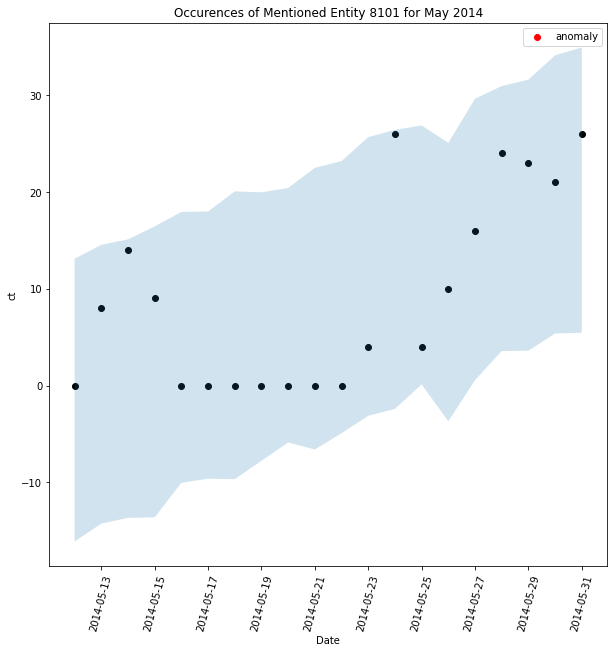

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df_noanomalies_8101.ds,df_noanomalies_8101.fact,c='k',label='_nolegend_')
ax.scatter(df_anomaly_8101.ds, df_anomaly_8101.fact,c='r',label='anomaly')
ax.fill_between(pred_8101.ds, pred_8101.yhat_lower, pred_8101.yhat_upper, alpha=0.2)
ax.set(xlabel='Date', ylabel = 'ct', title='Occurences of Mentioned Entity 8101 for May 2014')
leg = plt.legend(loc='best')
plt.xticks(rotation=75)

In [15]:
initial_df_24742 = pd.DataFrame()

initial_df_24742['ds'] = entity24742_df['dateTime']
initial_df_24742['y'] = entity24742_df['ct']

In [16]:
pred_24742 = fit_predict_model(initial_df_24742)

INFO:prophet:n_changepoints greater than number of observations. Using 15.


In [17]:
pred_24742 = detect_anomalies(pred_24742)

In [18]:
df_anomaly_24742 = pred_24742.drop(pred_24742[pred_24742.anomaly==0].index)
df_noanomalies_24742 = pred_24742.drop(pred_24742[pred_24742.anomaly!=0].index)

(array([16203., 16205., 16207., 16209., 16211., 16213., 16215., 16217.,
        16219., 16221.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

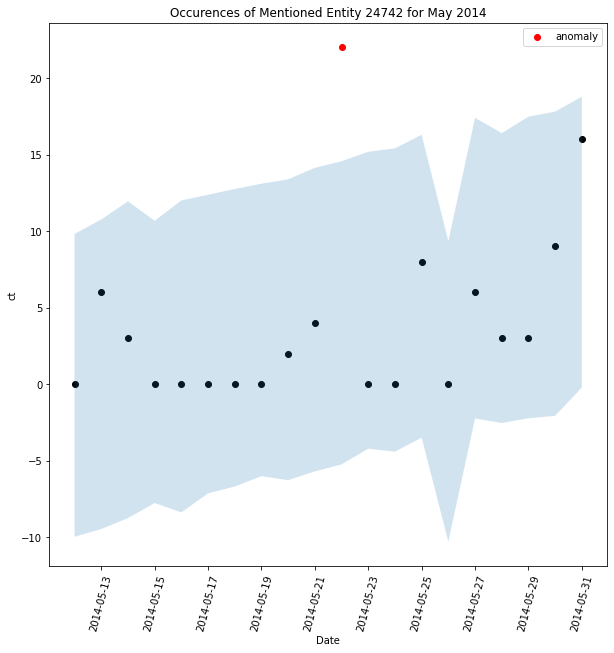

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df_noanomalies_24742.ds,df_noanomalies_24742.fact,c='k',label='_nolegend_')
ax.scatter(df_anomaly_24742.ds, df_anomaly_24742.fact,c='r',label='anomaly')
ax.fill_between(pred_24742.ds, pred_24742.yhat_lower,pred_24742.yhat_upper, alpha=0.2)
ax.set(xlabel='Date', ylabel = 'ct', title='Occurences of Mentioned Entity 24742 for May 2014')
leg = plt.legend(loc='best')
plt.xticks(rotation=75)